In [1]:
import sys
sys.path.append("../")
from datasets.hollywood2 import wav2spectrogram
import numpy as np
import os

In [3]:
# load .wav data and convert it to spectrogram
# resize spectrograms with the same SPEC_HEIGHT and SPEC_WIDTH
def save_hollywood2_audio_spec(list_path, out_dir, root_path="../datasets/Hollywood2/wav_audios/", postfix=".wav"):
    with open(list_path, "r") as fin:
        for line in fin.readlines():
            tmp = line.strip()
            wav_path = os.path.join(root_path, tmp+postfix)
            spec = wav2spectrogram(wav_path, FRAME_LENGTH=255, FRAME_STEP=128, SPEC_HEIGHT=500, SPEC_WIDTH=129)
            save_path = os.path.join(out_dir, f"{tmp}.npy")
            np.save(save_path, spec)

In [5]:
# list_train_audioclean.txt removes several wav data that cannot be converted
save_hollywood2_audio_spec("../datasets/Hollywood2/list_train_audioclean.txt", "../datasets/Hollywood2/spectrograms/")

In [6]:
save_hollywood2_audio_spec("../datasets/Hollywood2/list_test.txt", "../datasets/Hollywood2/spectrograms/")

In [2]:
# load speech recognition results and generate redundancy labels
import matplotlib.pyplot as plt
from datasets.hollywood2 import redundancy_speech

823


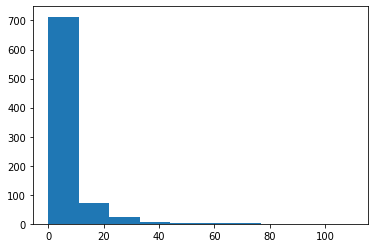

In [4]:
data_train = np.load("../datasets/Hollywood2/inference_outputs/speech_train.npy", allow_pickle=True)

p_list = list()
for d in data_train:
    p = redundancy_speech(d)
    p_list.append(p)

print(len(p_list))
plt.hist(p_list)
plt.show()

In [8]:
for min_len in range(10):
    filtered_num = len([p for p in p_list if p <= min_len])
    print(f"MIN-LEN={min_len}, Redundany Ratio={round(filtered_num/823., 3)}")

MIN-LEN=0, Redundany Ratio=0.134
MIN-LEN=1, Redundany Ratio=0.396
MIN-LEN=2, Redundany Ratio=0.527
MIN-LEN=3, Redundany Ratio=0.61
MIN-LEN=4, Redundany Ratio=0.676
MIN-LEN=5, Redundany Ratio=0.722
MIN-LEN=6, Redundany Ratio=0.759
MIN-LEN=7, Redundany Ratio=0.785
MIN-LEN=8, Redundany Ratio=0.809
MIN-LEN=9, Redundany Ratio=0.838


In [9]:
# choose MIN-LEN as 2 and save redundancy labels
MIN_LEN = 2
for split in ["train", "test"]:
    speech_data =  np.load(f"../datasets/Hollywood2/inference_outputs/speech_{split}.npy", allow_pickle=True)
    res = list()
    for d in speech_data:
        p = redundancy_speech(d)
        if p <= MIN_LEN:
            res.append([0])
        else:
            res.append([1])
    res = np.array(res)
    redundancy_ratio = 1.0 - res.sum() / len(res)
    print(split, redundancy_ratio)
    np.save(f"../datasets/Hollywood2/redundancy_labels/speech_wnum{MIN_LEN}_{split}.npy", res)

train 0.5273390036452005
test 0.498868778280543
